<a href="https://colab.research.google.com/github/yuki-tamaribuchi/kaggle_codes/blob/master/titanic_advfe_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/gunesevitan/titanic-advanced-feature-engineering-tutorial

In [1]:
!mkdir /root/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json /root/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
!kaggle competitions download -c titanic

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

In [5]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
all_df=concat_df(train_df,test_df)
train_df.name='Training Set'
test_df.name='Test Set'
all_df.name='All Set'
dfs=[train_df,test_df]

In [6]:
def display_missing(df):
  for col in df.columns.tolist():
    print('{} column missing values:{}'.format(col,df[col].isnull().sum()))
  print('\n')

for df in dfs:
  print(df.name)
  display_missing(df)

Training Set
PassengerId column missing values:0
Survived column missing values:0
Pclass column missing values:0
Name column missing values:0
Sex column missing values:0
Age column missing values:177
SibSp column missing values:0
Parch column missing values:0
Ticket column missing values:0
Fare column missing values:0
Cabin column missing values:687
Embarked column missing values:2


Test Set
PassengerId column missing values:0
Pclass column missing values:0
Name column missing values:0
Sex column missing values:0
Age column missing values:86
SibSp column missing values:0
Parch column missing values:0
Ticket column missing values:0
Fare column missing values:1
Cabin column missing values:327
Embarked column missing values:0




In [7]:
all_df_corr=all_df.corr().abs().unstack().sort_values(kind='quicksort',ascending=False).reset_index()

In [8]:
all_df_corr.rename(columns={'level_0':'Feature 1','level_1':'Feature 2',0:'Correlation Coefficient'},inplace=True)
all_df_corr[all_df_corr['Feature 1']=='Age']

,Feature 1,Feature 2,Correlation Coefficient
6,Age,Age,1.000000
9,Age,Pclass,0.408106
17,Age,SibSp,0.243699
22,Age,Fare,0.178740
25,Age,Parch,0.150917
29,Age,Survived,0.077221
41,Age,PassengerId,0.028814


In [9]:
age_by_pclass_sex=all_df.groupby(['Sex','Pclass']).median()['Age']

In [10]:
age_by_pclass_sex

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [11]:
for pclass in range(1,4):
  for sex in ['female','male']:
    print('Median age of Pclass {} {}s: {}'.format(pclass,sex,age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(all_df['Age'].median()))

all_df['Age']=all_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [12]:
all_df[all_df['Embarked'].isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [13]:
all_df['Embarked']=all_df['Embarked'].fillna('S')

In [14]:
all_df[all_df['Fare'].isna()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [15]:
med_fare=all_df.groupby(['Pclass','SibSp','Parch']).Fare.median()[3][0][0]

In [16]:
med_fare

7.8542

In [17]:
all_df['Fare']=all_df['Fare'].fillna(med_fare)

In [18]:
all_df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [19]:
all_df['Deck']=all_df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
all_df_decks=all_df.groupby(['Deck','Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

In [20]:
all_df_decks

Deck     A   B   C   D      E         F     G   M            T
Pclass   1   1   1   1  2   1  2  3   2  3  3   1    2    3  1
Count   22  65  94  40  6  34  4  3  13  8  5  67  254  693  1

In [21]:
def get_pclass_dist(df):
  deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
  decks=df.columns.levels[0]

  for deck in decks:
    for pclass in range(1,4):
      try:
        count=df[deck][pclass][0]
        deck_counts[deck][pclass]=count
      except KeyError:
        deck_counts[deck][pclass]=0

  df_decks=pd.DataFrame(deck_counts)
  deck_percentages={}

  for col in df_decks.columns:
    deck_percentages[col]=[(count/df_decks[col].sum())*100 for count in df_decks[col]]
  
  return deck_counts,deck_percentages

In [22]:
def display_pclass_dist(percentages):
   df_percentages = pd.DataFrame(percentages).transpose()
   deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
   bar_count = np.arange(len(deck_names))  
   bar_width = 0.85
   
   pclass1 = df_percentages[0]
   pclass2 = df_percentages[1]
   pclass3 = df_percentages[2] 
   plt.figure(figsize=(20, 10))
   plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
   plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
   plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3') 
   plt.xlabel('Deck', size=15, labelpad=20)
   plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
   plt.xticks(bar_count, deck_names)    
   plt.tick_params(axis='x', labelsize=15)
   plt.tick_params(axis='y', labelsize=15)
   
   plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
   plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
   
   plt.show()    

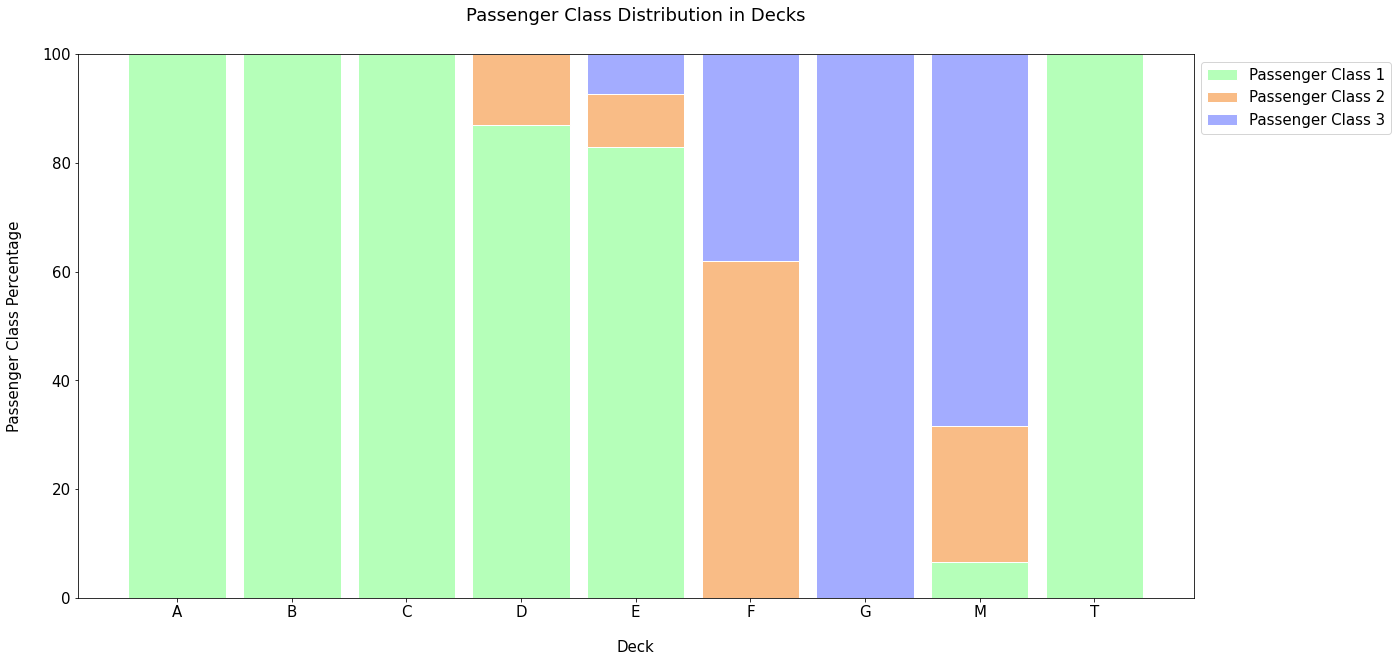

In [23]:
all_deck_count,all_deck_per=get_pclass_dist(all_df_decks)
display_pclass_dist(all_deck_per)

In [24]:
idx=all_df[all_df['Deck']=='T'].index
all_df.loc[idx,'Deck']='A'

In [25]:
df_all_decks_survived=all_df.groupby(['Deck','Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

In [26]:
def get_survived_dist(df):
  surv_counts={'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
  decks = df.columns.levels[0]

  for deck in decks:
    for survive in range(0, 2):
      surv_counts[deck][survive] = df[deck][survive][0]

  df_surv = pd.DataFrame(surv_counts)
  surv_percentages = {}
  for col in df_surv.columns:
      surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
      
  return surv_counts, surv_percentages

In [27]:
def display_surv_dist(percentages):
  
  df_survived_percentages = pd.DataFrame(percentages).transpose()
  deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
  bar_count = np.arange(len(deck_names))  
  bar_width = 0.85    
  not_survived = df_survived_percentages[0]
  survived = df_survived_percentages[1]
  
  plt.figure(figsize=(20, 10))
  plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
  plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
  plt.xlabel('Deck', size=15, labelpad=20)
  plt.ylabel('Survival Percentage', size=15, labelpad=20)
  plt.xticks(bar_count, deck_names)    
  plt.tick_params(axis='x', labelsize=15)
  plt.tick_params(axis='y', labelsize=15)
  
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
  plt.title('Survival Percentage in Decks', size=18, y=1.05)
  
  plt.show()

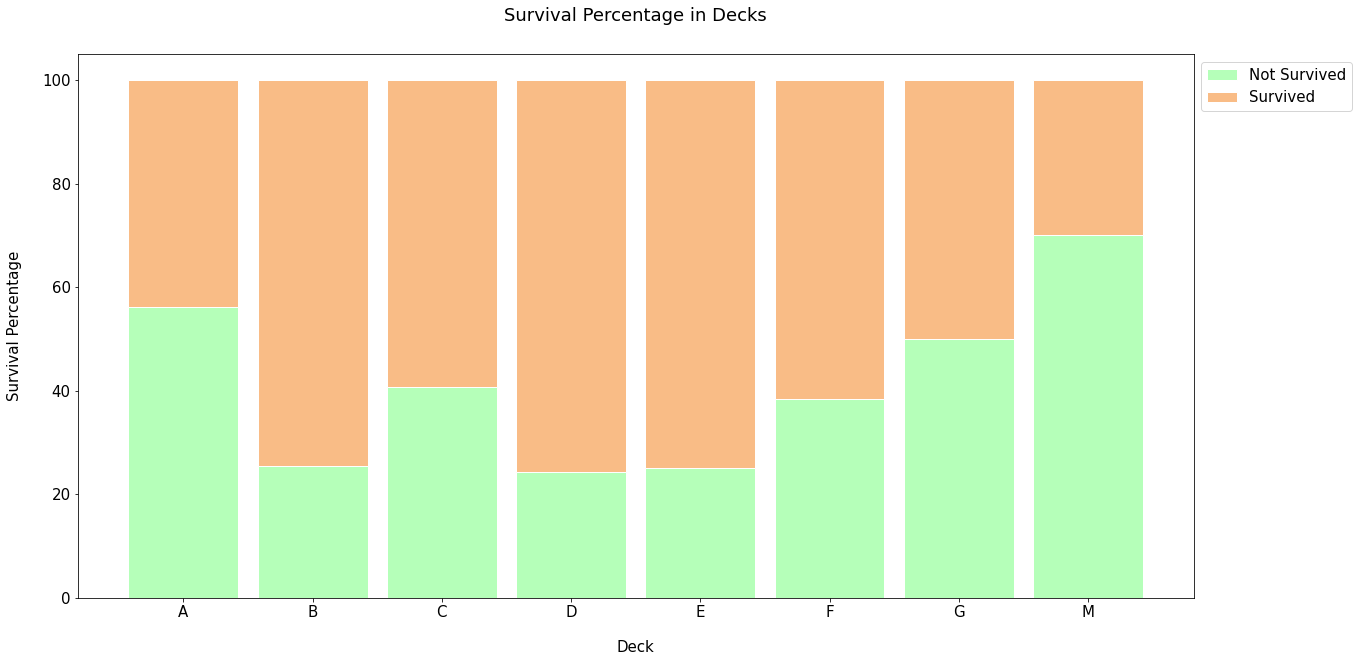

In [28]:
all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

In [29]:
all_df['Deck']=all_df['Deck'].replace(['A','B','C'],'ABC')
all_df['Deck']=all_df['Deck'].replace(['D','E'],'DE')
all_df['Deck']=all_df['Deck'].replace(['F','G'],'FG')

In [30]:
all_df['Deck'].value_counts()

M      1014
ABC     182
DE       87
FG       26
Name: Deck, dtype: int64

In [31]:
all_df.drop(['Cabin'],inplace=True,axis=1)
df_train,df_test=divide_df(all_df)
dfs=[df_train,df_test]
for df in dfs:
  display_missing(df)

Age column missing values:0
Embarked column missing values:0
Fare column missing values:0
Name column missing values:0
Parch column missing values:0
PassengerId column missing values:0
Pclass column missing values:0
Sex column missing values:0
SibSp column missing values:0
Survived column missing values:0
Ticket column missing values:0
Deck column missing values:0


Age column missing values:0
Embarked column missing values:0
Fare column missing values:0
Name column missing values:0
Parch column missing values:0
PassengerId column missing values:0
Pclass column missing values:0
Sex column missing values:0
SibSp column missing values:0
Ticket column missing values:0
Deck column missing values:0




342 of 891 passengers survived and it is the 38.38% of the training set.
549 of 891 passengers didnt survive and it is the 61.62% of the training set.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


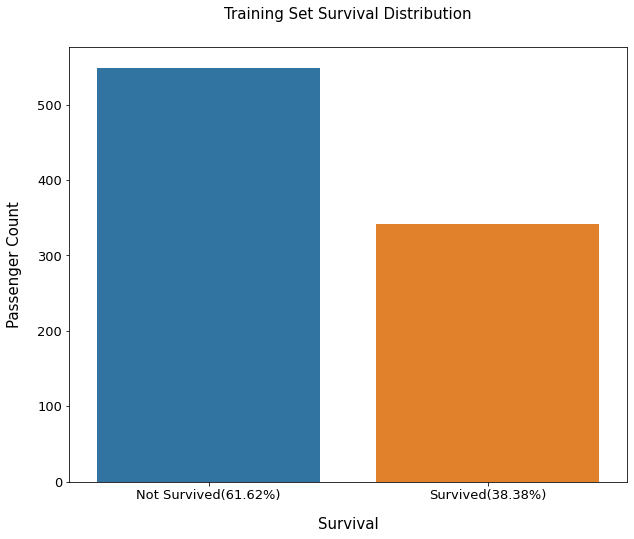

In [32]:
survived=df_train['Survived'].value_counts()[1]
not_survived=df_train['Survived'].value_counts()[0]
survived_per=survived/df_train.shape[0]*100
not_survived_per=not_survived/df_train.shape[0]*100

print('{} of {} passengers survived and it is the {:.2f}% of the training set.'.format(survived, df_train.shape[0], survived_per))
print('{} of {} passengers didnt survive and it is the {:.2f}% of the training set.'.format(not_survived, df_train.shape[0], not_survived_per))

plt.figure(figsize=(10,8))
sns.countplot(df_train['Survived'])

plt.xlabel('Survival',size=15,labelpad=15)
plt.ylabel('Passenger Count',size=15,labelpad=15)
plt.xticks((0,1),['Not Survived({0:.2f}%)'.format(not_survived_per),'Survived({0:.2f}%)'.format(survived_per)])
plt.tick_params(axis='x',labelsize=13)
plt.tick_params(axis='y',labelsize=13)

plt.title('Training Set Survival Distribution',size=15,y=1.05)
plt.show()

In [33]:
df_train_corr=df_train.drop(['PassengerId'],axis=1).corr().abs().unstack().sort_values(kind='quciksort',ascending=False).reset_index()
df_train_corr.rename(columns={'level_0':'Feature 1','level_1':'Feature 2',0:'Correlation Coefficient'},inplace=True)
df_train_corr.drop(df_train_corr.iloc[1::2].index, inplace=True)
df_train_corr_nd = df_train_corr.drop(df_train_corr[df_train_corr['Correlation Coefficient'] == 1.0].index)

df_test_corr = df_test.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_test_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_test_corr.drop(df_test_corr.iloc[1::2].index, inplace=True)
df_test_corr_nd = df_test_corr.drop(df_test_corr[df_test_corr['Correlation Coefficient'] == 1.0].index)

In [34]:
corr=df_train_corr_nd['Correlation Coefficient']>0.1
df_train_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Pclass,Fare,0.549500
8,Pclass,Age,0.417667
10,SibSp,Parch,0.414838
12,Survived,Pclass,0.338481
14,Survived,Fare,0.257307
16,SibSp,Age,0.249747
18,Parch,Fare,0.216225
20,Age,Parch,0.176733
22,SibSp,Fare,0.159651
24,Age,Fare,0.124061


In [35]:
corr=df_test_corr_nd['Correlation Coefficient']>0.1
df_test_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
6,Fare,Pclass,0.577489
8,Age,Pclass,0.526789
10,Age,Fare,0.345347
12,SibSp,Parch,0.306895
14,Fare,Parch,0.230410
16,SibSp,Fare,0.172032


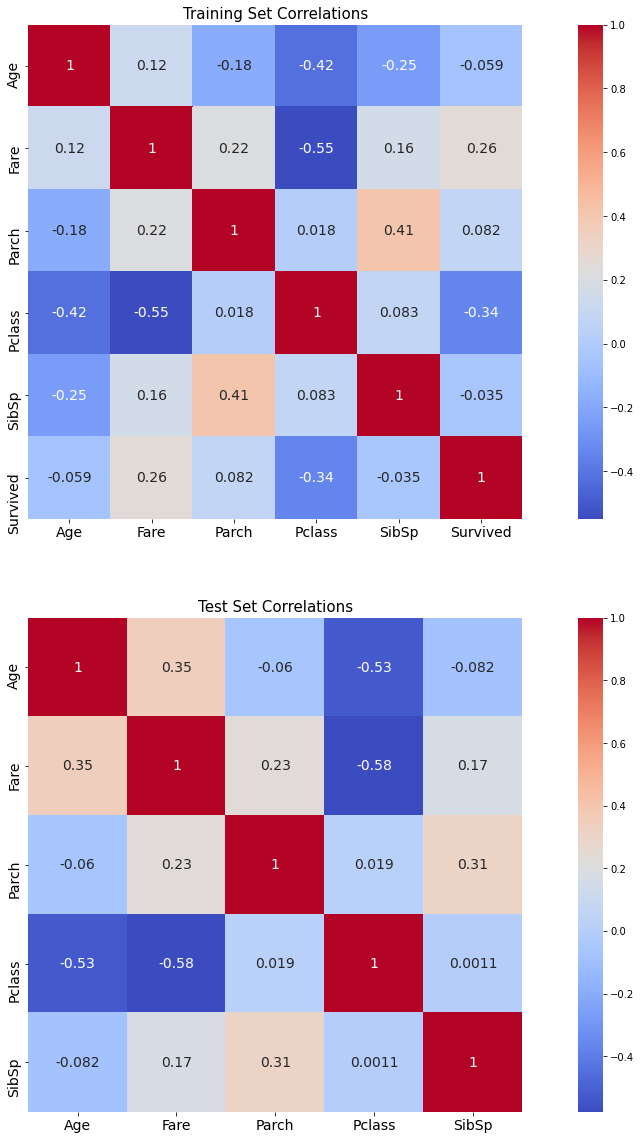

In [36]:
fig,axs=plt.subplots(nrows=2,figsize=(20,20))

sns.heatmap(df_train.drop(['PassengerId'],axis=1).corr(),ax=axs[0],annot=True,square=True,cmap='coolwarm',annot_kws={'size':14})

sns.heatmap(df_test.drop(['PassengerId'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Training Set Correlations', size=15)
axs[1].set_title('Test Set Correlations', size=15)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function f

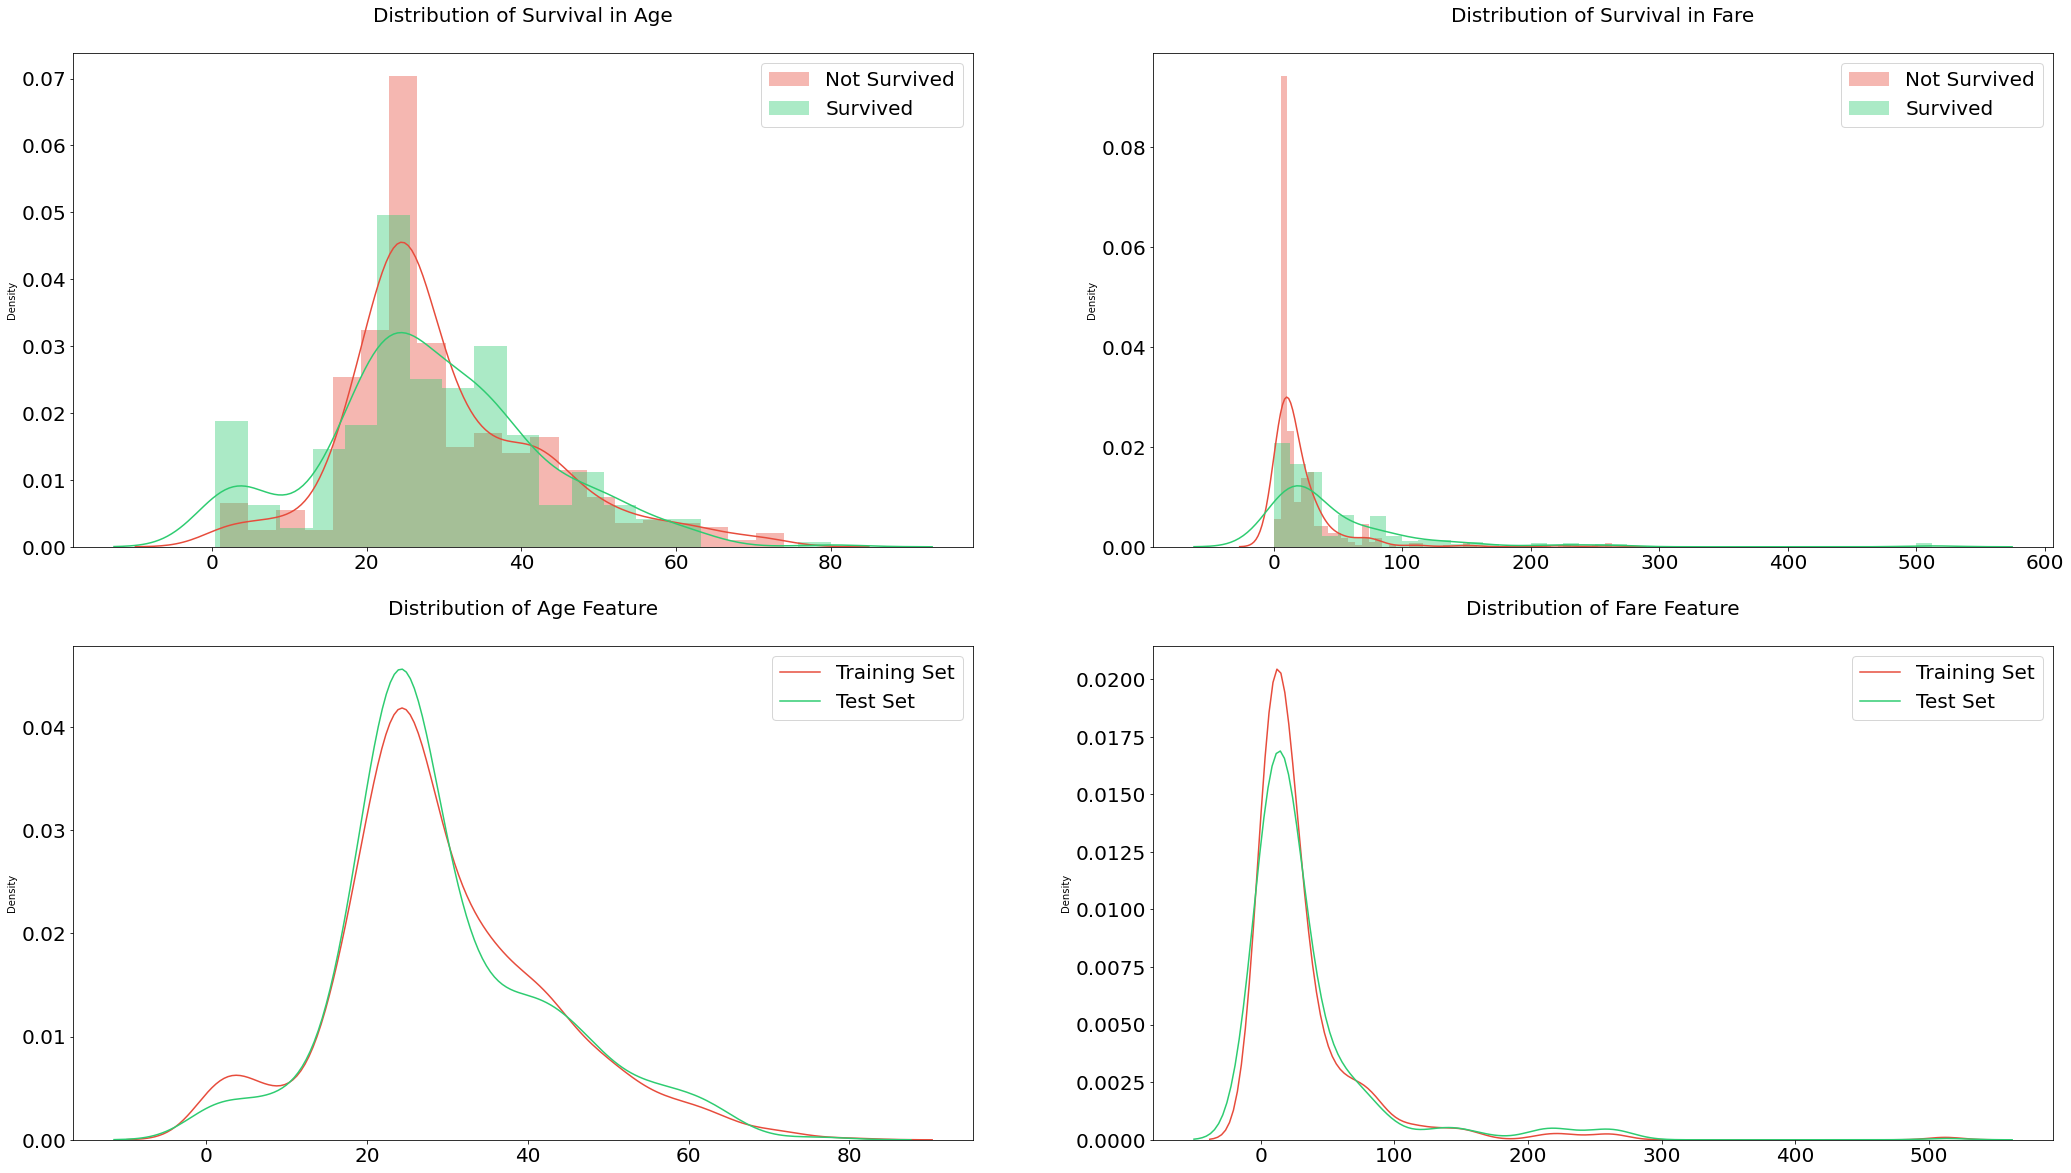

In [37]:
cont_features=['Age','Fare']
surv=df_train['Survived']==1

fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(20,20))
plt.subplots_adjust(right=1.5)

for i,feature in enumerate(cont_features):
  sns.distplot(df_train[~surv][feature],label='Not Survived',hist=True,color='#e74c3c', ax=axs[0][i])
  sns.distplot(df_train[surv][feature],label='Survived',hist=True,color='#2ecc71', ax=axs[0][i])

  sns.distplot(df_train[feature],label='Training Set',hist=False,color='#e74c3c', ax=axs[1][i])
  sns.distplot(df_test[feature],label='Test Set',hist=False,color='#2ecc71', ax=axs[1][i])

  axs[0][i].set_xlabel('')
  axs[1][i].set_xlabel('')

  for j in range(2):        
    axs[i][j].tick_params(axis='x', labelsize=20)
    axs[i][j].tick_params(axis='y', labelsize=20)

  axs[0][i].legend(loc='upper right', prop={'size': 20})
  axs[1][i].legend(loc='upper right', prop={'size': 20})
  axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)
axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
      
plt.show()

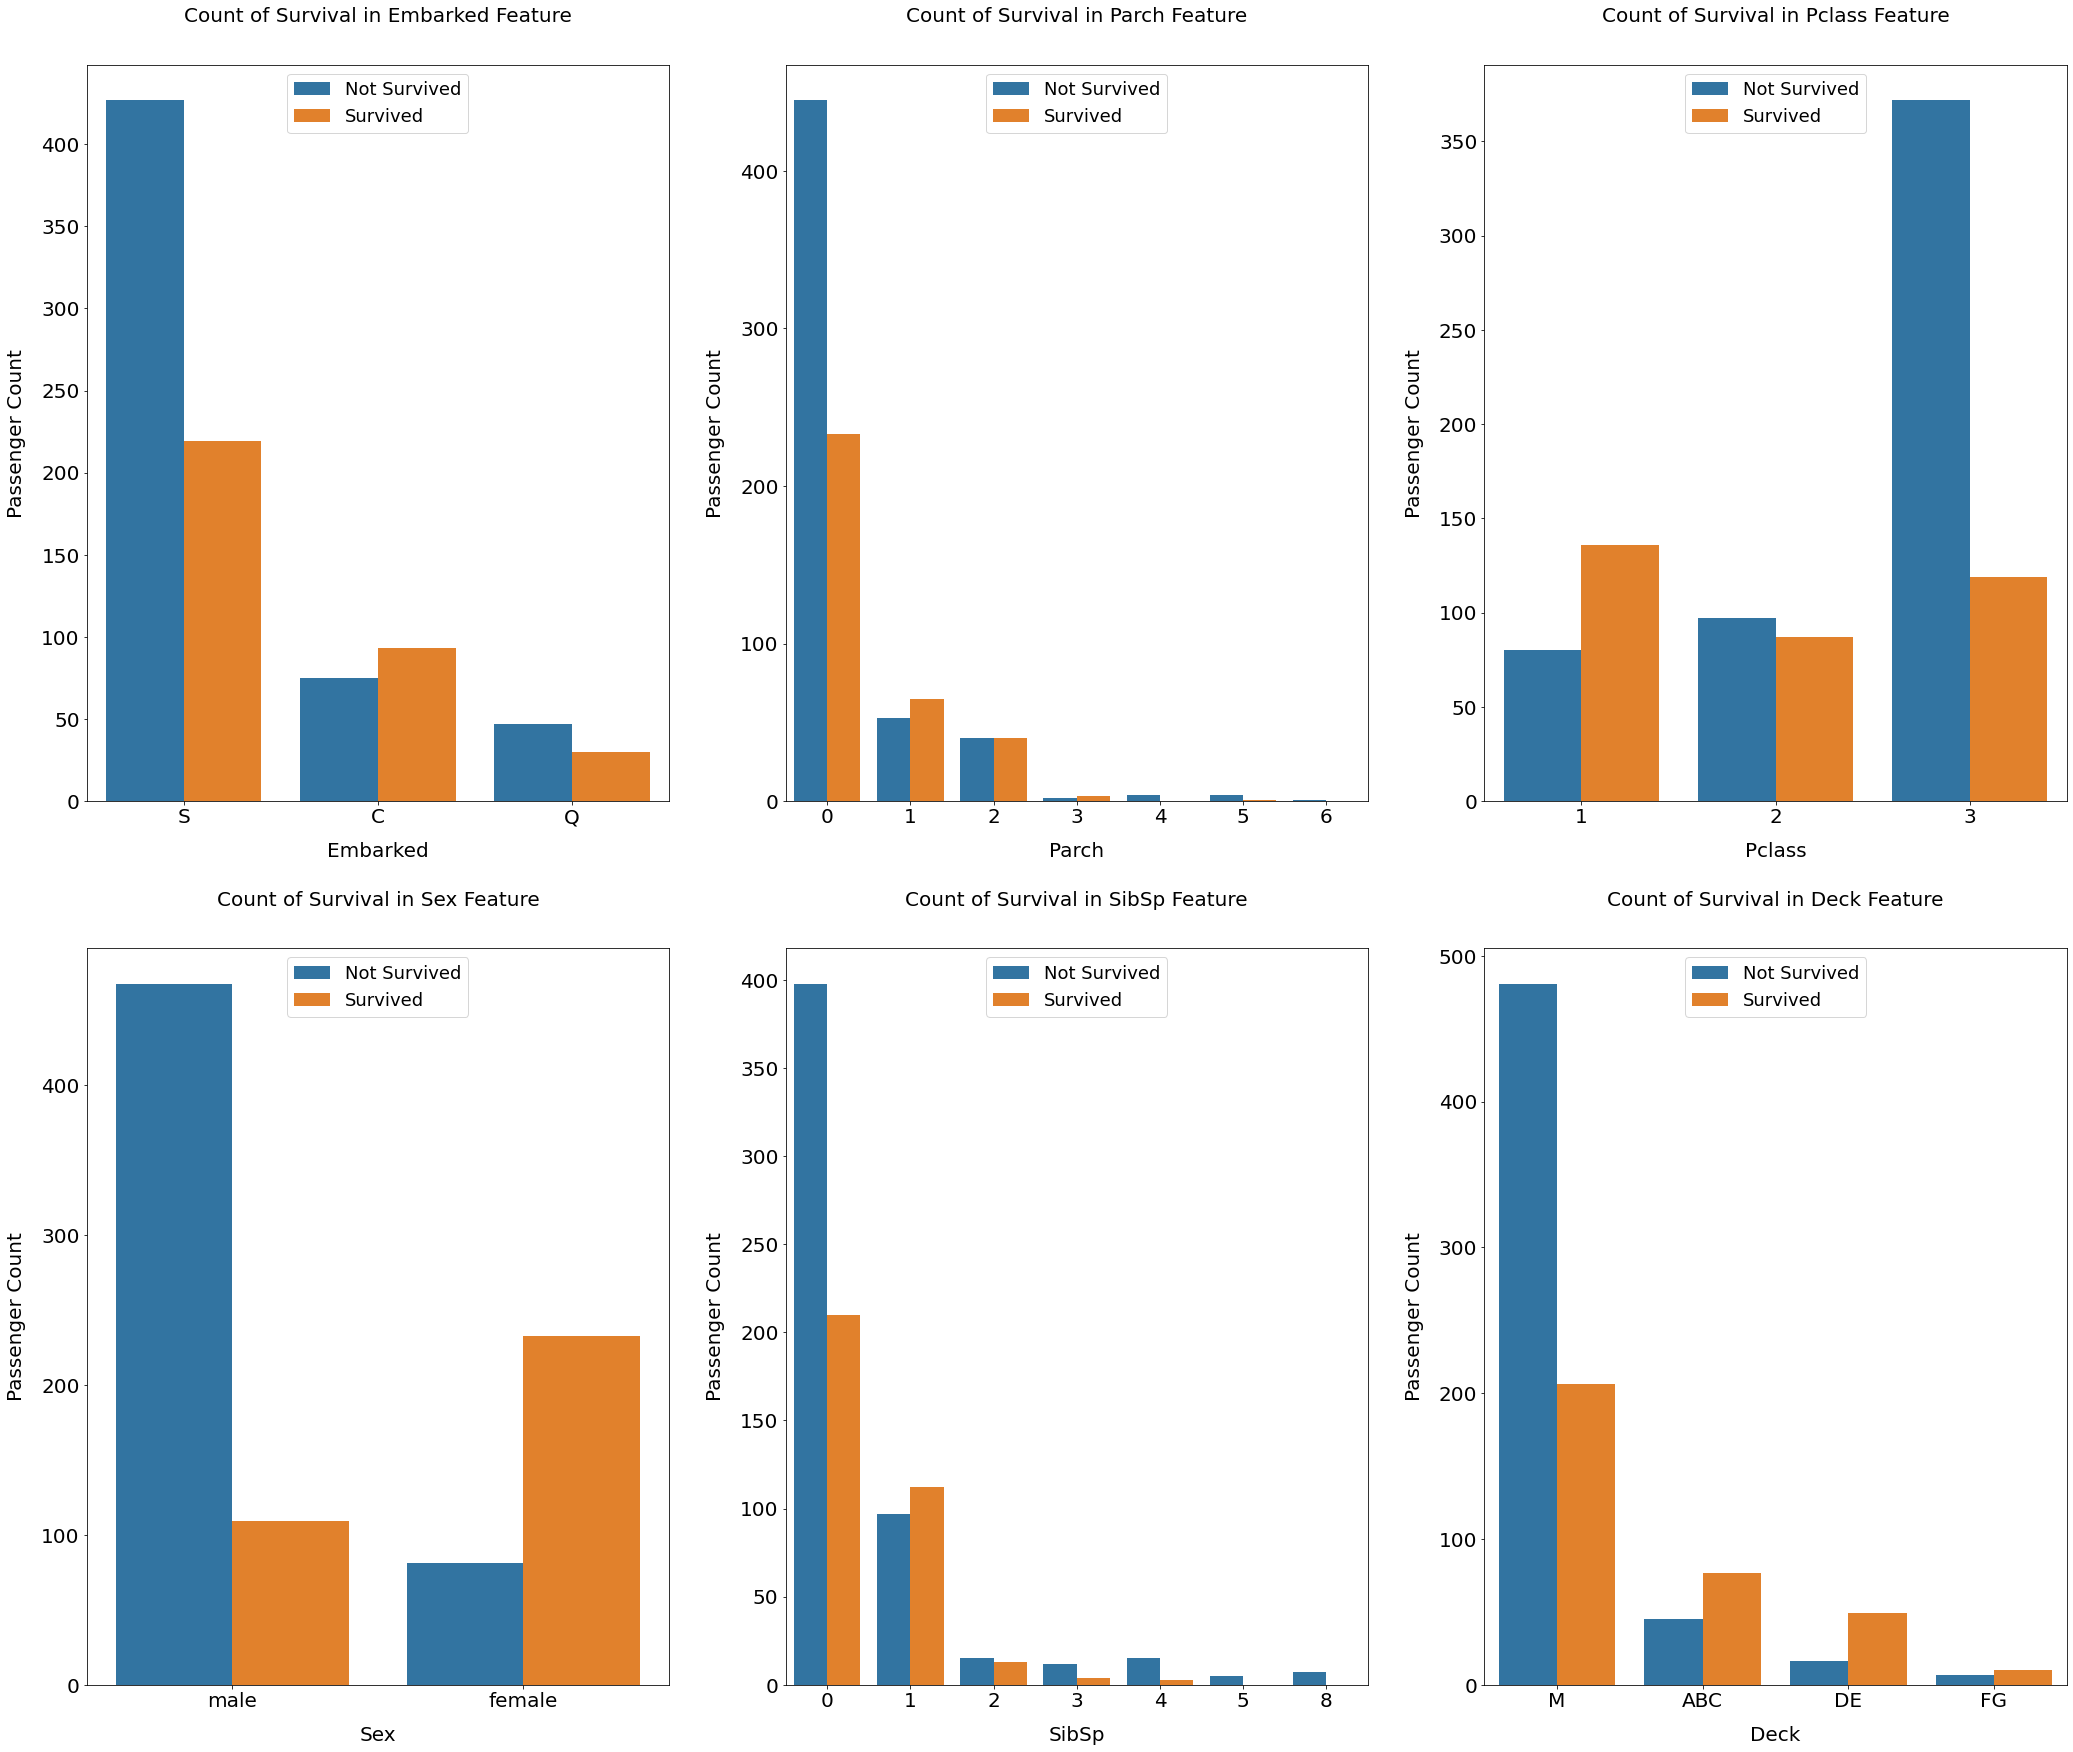

In [38]:
cat_features=['Embarked','Parch','Pclass','Sex','SibSp','Deck']

fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(20,20))
plt.subplots_adjust(right=1.5,top=1.25)

for i ,feature in enumerate(cat_features,1):
  plt.subplot(2,3,i)
  sns.countplot(x=feature,hue='Survived',data=df_train)

  plt.xlabel('{}'.format(feature), size=20, labelpad=15)
  plt.ylabel('Passenger Count', size=20, labelpad=15)    
  plt.tick_params(axis='x', labelsize=20)
  plt.tick_params(axis='y', labelsize=20)

  plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
  plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

In [39]:
all_df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,ABC
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,ABC
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M


In [40]:
all_df['Fare']=pd.qcut(all_df['Fare'],13)

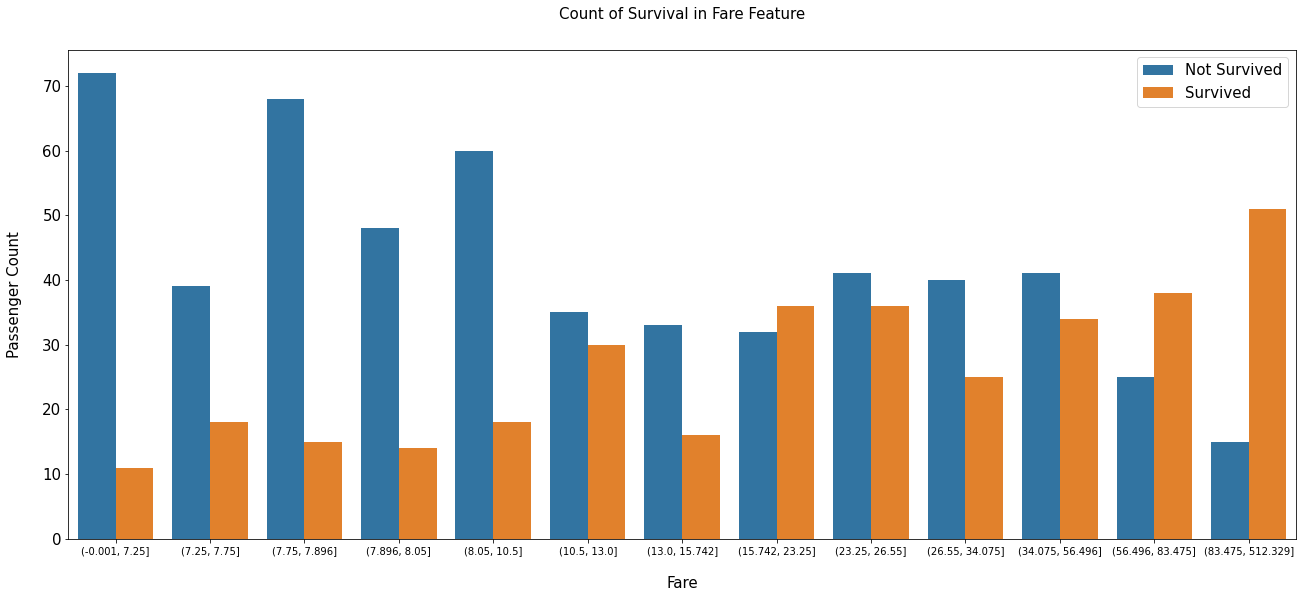

In [41]:
fig,axs=plt.subplots(figsize=(22,9))
sns.countplot(x='Fare',hue='Survived',data=all_df)

plt.xlabel('Fare',size=15,labelpad=20)
plt.ylabel('Passenger Count',size=15,labelpad=20)
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=15)

plt.legend(['Not Survived','Survived'],loc='upper right',prop={'size':15})
plt.title('Count of Survival in {} Feature'.format('Fare'),size=15,y=1.05)

plt.show()

In [42]:
all_df['Age']=pd.qcut(all_df['Age'],10)

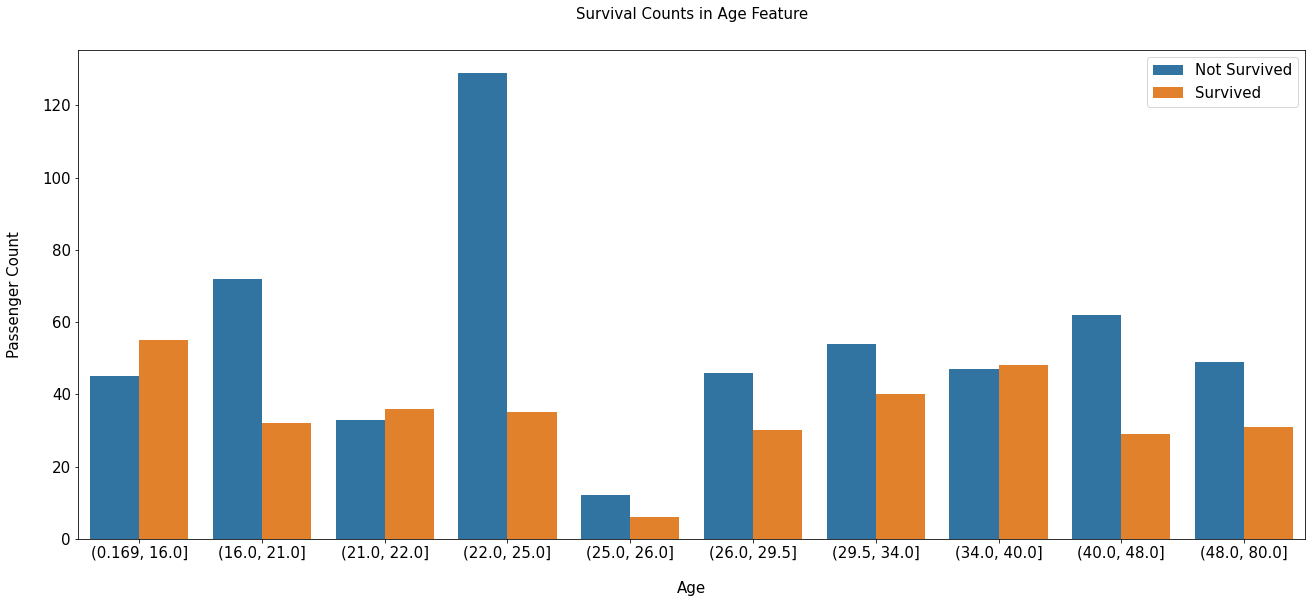

In [43]:
fig,axs=plt.subplots(figsize=(22,9))
sns.countplot(x='Age',hue='Survived',data=all_df)

plt.xlabel('Age',size=15,labelpad=20)
plt.ylabel('Passenger Count',size=15,labelpad=20)

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

In [44]:
all_df['Family_Size']=all_df['Parch']+all_df['SibSp']+1

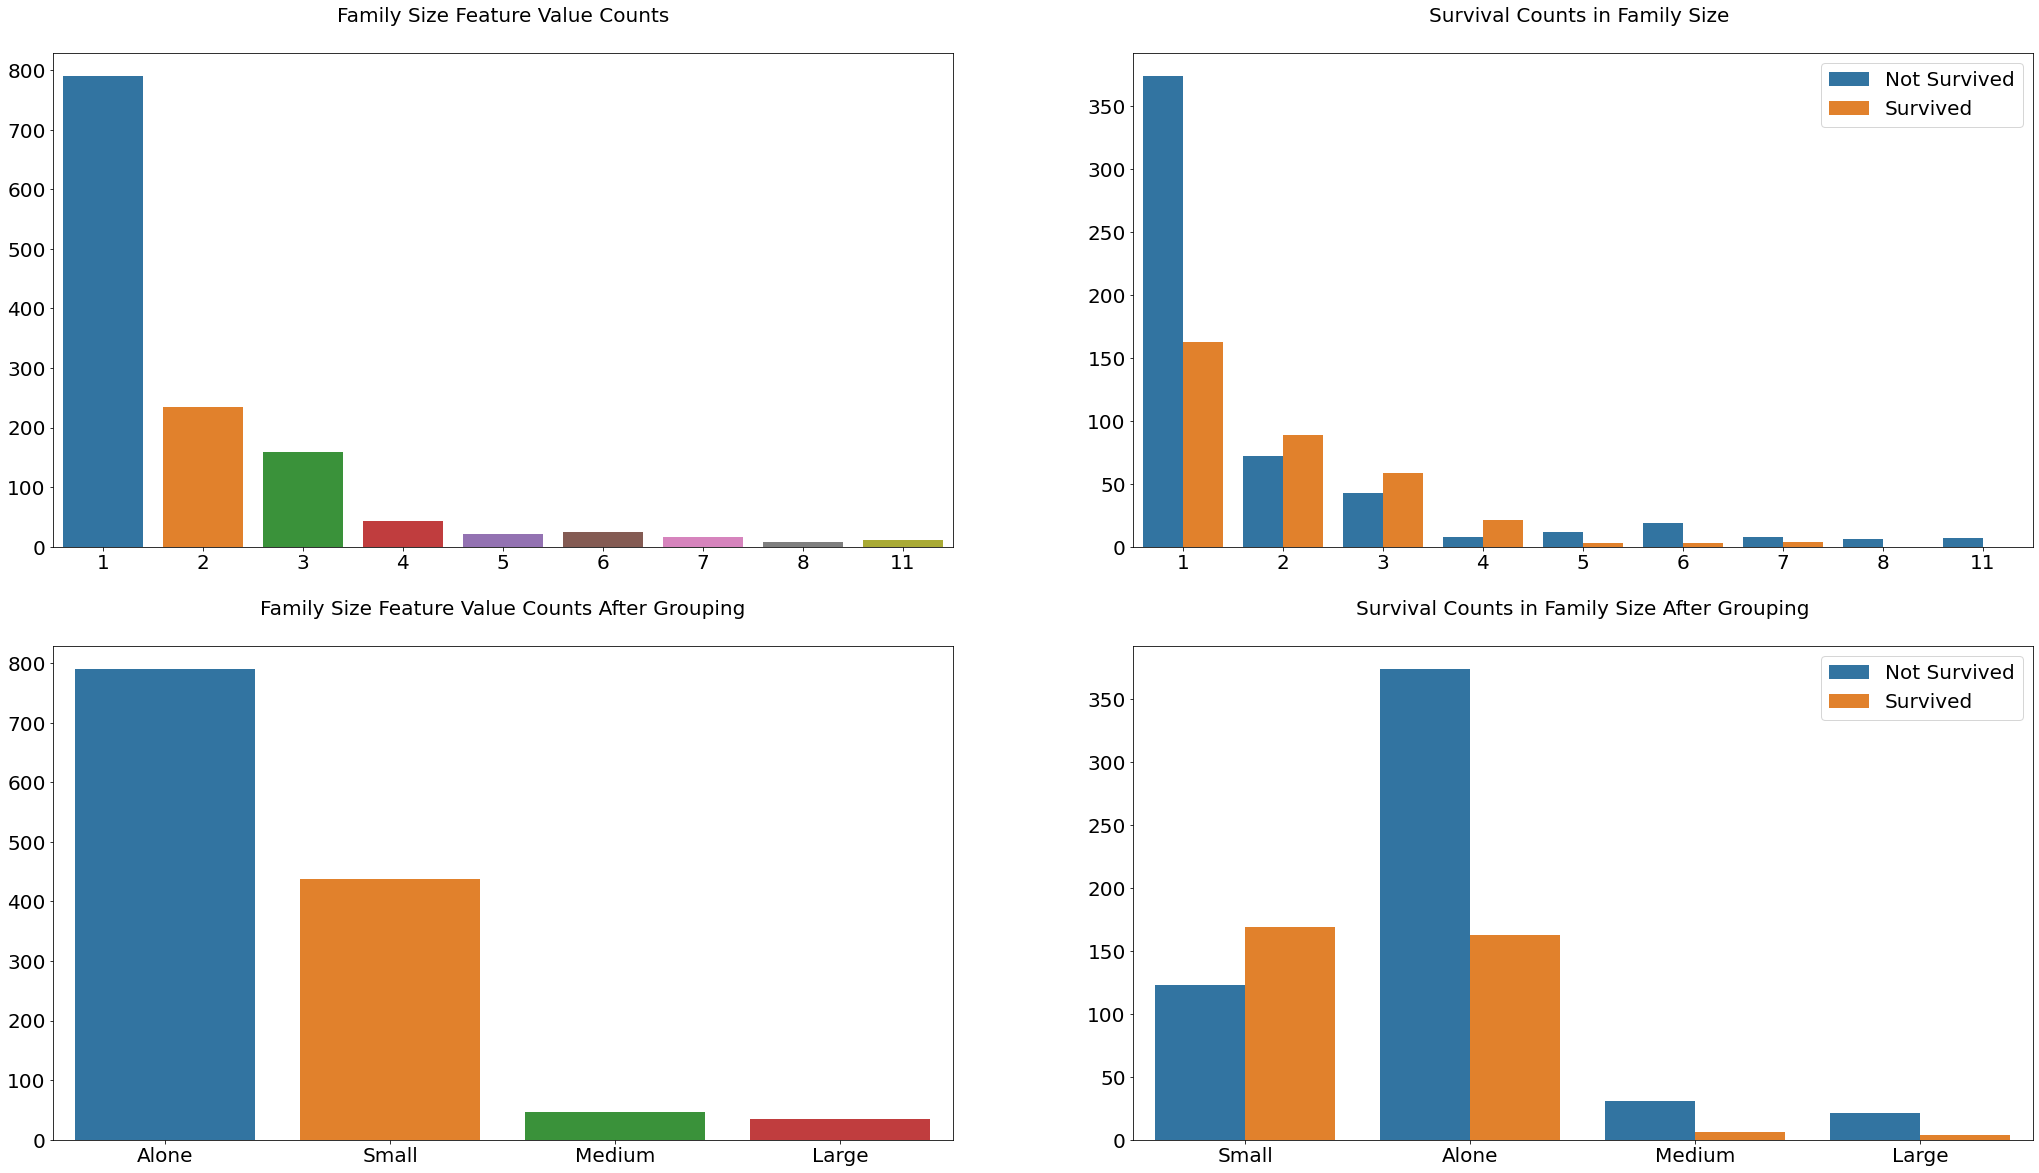

In [45]:
fig,axs=plt.subplots(figsize=(20,20),ncols=2,nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=all_df['Family_Size'].value_counts().index,y=all_df['Family_Size'].value_counts().values,ax=axs[0][0])

sns.countplot(x='Family_Size',hue='Survived',data=all_df,ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map={1:'Alone',2:'Small',3:'Small',4:'Small',5:'Medium',6:'Medium',7:'Large',8:'Large',11:'Large'}
all_df['Family_Size_Grouped']=all_df['Family_Size'].map(family_map)

sns.barplot(x=all_df['Family_Size_Grouped'].value_counts().index,y=all_df['Family_Size_Grouped'].value_counts().values,ax=axs[1][0])

sns.countplot(x='Family_Size_Grouped',hue='Survived',data=all_df,ax=axs[1][1])


axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.show()

In [46]:
all_df['Ticket_Frequency']=all_df.groupby('Ticket')['Ticket'].transform('count')

In [47]:
all_df['Ticket_Frequency']

0       1
1       2
2       1
3       2
4       1
       ..
1304    1
1305    3
1306    1
1307    1
1308    3
Name: Ticket_Frequency, Length: 1309, dtype: int64

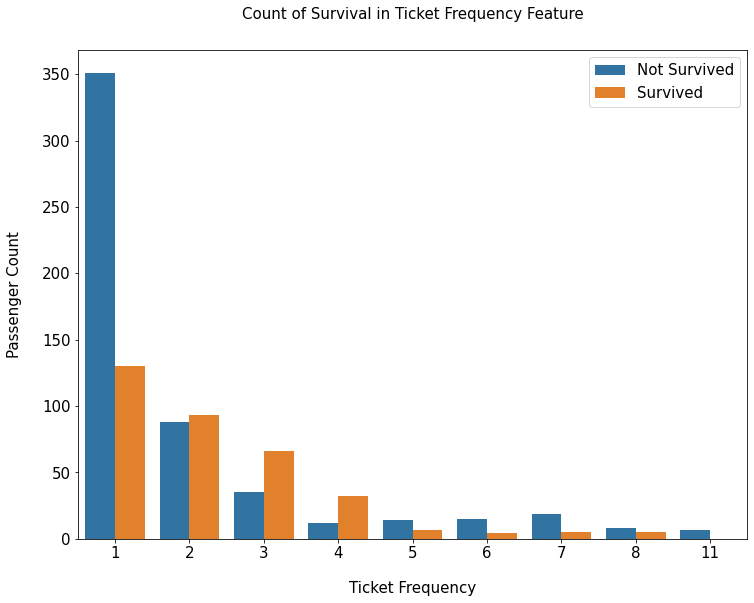

In [48]:
fig,axs=plt.subplots(figsize=(12,9))
sns.countplot(x='Ticket_Frequency',hue='Survived',data=all_df)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

In [49]:
all_df['Title']=all_df['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]
all_df['Is_Married']=0
all_df['Is_Married'].loc[all_df['Title']=='Mrs']=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [50]:
all_df['Is_Married']

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: Is_Married, Length: 1309, dtype: int64

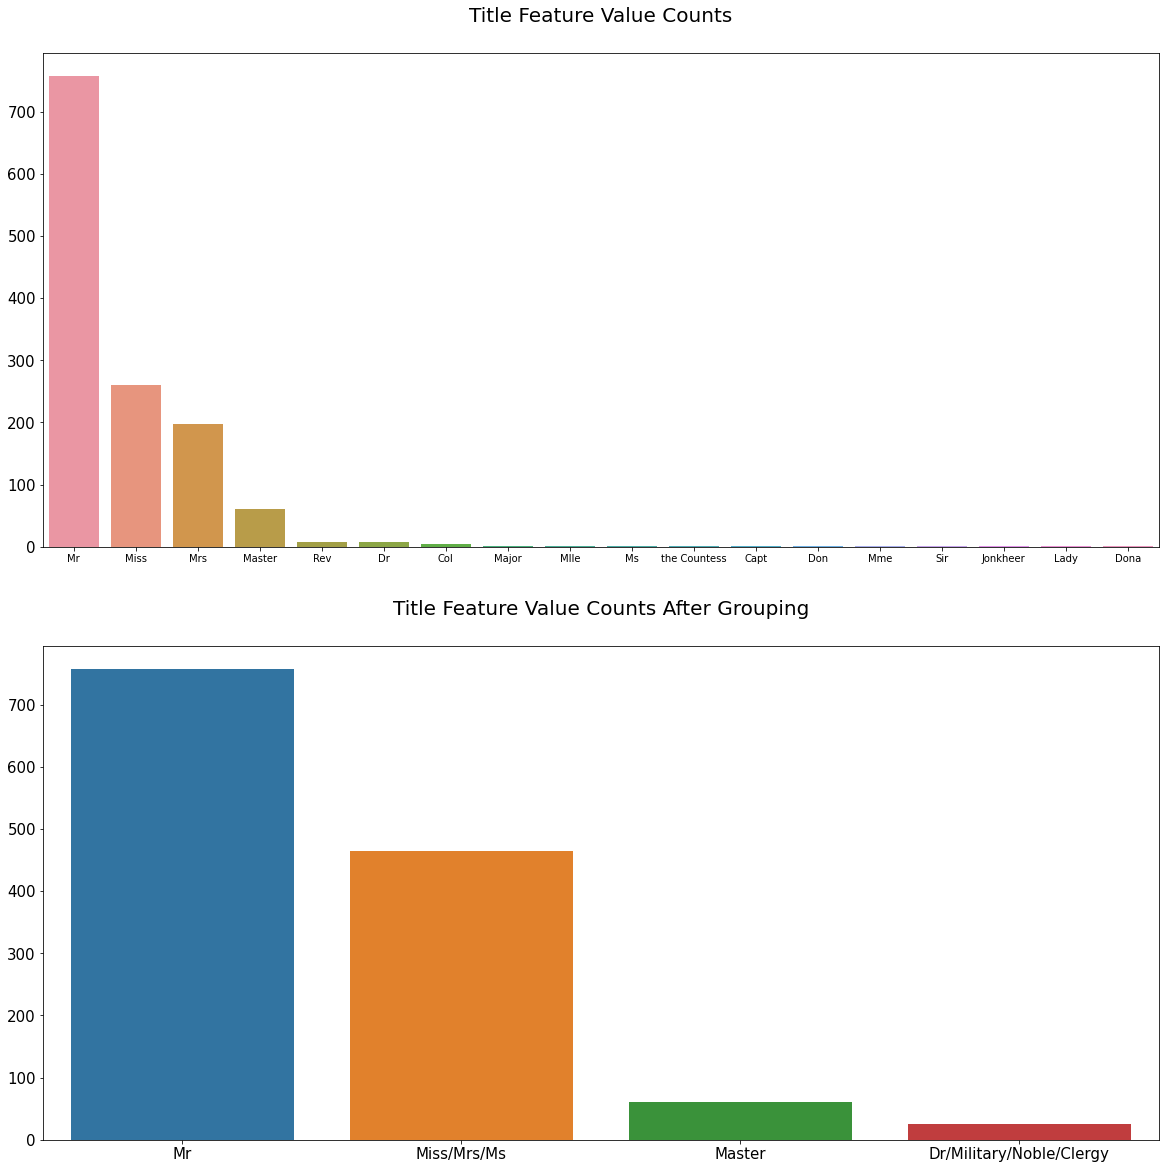

In [51]:
fig,axs=plt.subplots(nrows=2,figsize=(20,20))

sns.barplot(x=all_df['Title'].value_counts().index,y=all_df['Title'].value_counts().values,ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
  axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

all_df['Title']=all_df['Title'].replace(['Miss','Mrs','Ms','Mlle','Lady','Mme','the Countess','Dona'],'Miss/Mrs/Ms')
all_df['Title']=all_df['Title'].replace(['Dr','Col','Major','Jonkheer','Capt','Sir','Don','Rev'],'Dr/Military/Noble/Clergy')

sns.barplot(x=all_df['Title'].value_counts().index,y=all_df['Title'].value_counts().values,ax=axs[1])

axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

In [52]:
all_df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,"(21.0, 22.0]",S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,M,2,Small,1,Mr,0
1,"(34.0, 40.0]",C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,ABC,2,Small,2,Miss/Mrs/Ms,1
2,"(25.0, 26.0]",S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,M,1,Alone,1,Miss/Mrs/Ms,0
3,"(34.0, 40.0]",S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,ABC,2,Small,2,Miss/Mrs/Ms,1
4,"(34.0, 40.0]",S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,M,1,Alone,1,Mr,0


In [53]:
def extract_surname(data):
  import string

  families=[]

  for i in range(len(data)):
    name=data.iloc[i]

    if '(' in name:
      name_no_bracket=name.split('(')[0]
    else:
      name_no_bracket=name
    
    family=name_no_bracket.split(',')[0]
    title=name_no_bracket.split(',')[1].strip().split(' ')[0]

    for c in string.punctuation:
      family=family.replace(c,'').strip()

    families.append(family)

  return families

In [54]:
all_df['Family']=extract_surname(all_df['Name'])

In [55]:
df_train=all_df.loc[:890]
df_test=all_df.loc[891:]
dfs=[df_train,df_test]

In [56]:
non_unique_families=[x for x in df_train['Family'].unique() if x in df_test['Family'].unique()]
non_unique_tickets=[x for x in df_train['Ticket'].unique() if x in df_test['Family'].unique()]

df_family_survival_rate=df_train.groupby(['Family'])['Survived','Family','Family_Size'].median()
df_ticket_survival_rate=df_train.groupby(['Ticket'])['Survived','Ticket','Ticket_Frequency'].median()

family_rates={}
ticket_rates={}

for i in range(len(df_family_survival_rate)):
  if df_family_survival_rate.index[i] in non_unique_families and df_family_survival_rate.iloc[i,1]>1:
    family_rates[df_family_survival_rate.index[i]]=df_family_survival_rate.iloc[i,0]

for i in range(len(df_ticket_survival_rate)):
  if df_ticket_survival_rate.index[i] in non_unique_tickets and df_ticket_survival_rate.iloc[i,1]>1:
    ticket_rates[df_ticket_survival_rate.index[i]]=df_ticket_survival_rate.iloc[i,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


In [57]:
mean_survival_rate=np.mean(df_train['Survived'])

train_family_survival_rate=[]
train_family_survival_rate_NA=[]
test_family_survival_rate=[]
test_family_survival_rate_NA=[]

for i in range(len(df_train)):
  if df_train['Family'][i] in family_rates:
    train_family_survival_rate.append(family_rates[df_train['Family'][i]])
    train_family_survival_rate_NA.append(1)
  else:
    train_family_survival_rate.append(mean_survival_rate)
    train_family_survival_rate_NA.append(0)
  
for i in range(len(df_test)):
  if df_test['Family'].iloc[i] in family_rates:
    test_family_survival_rate.append(family_rates[df_test['Family'].iloc[i]])
    test_family_survival_rate_NA.append(1)
  else:
    test_family_survival_rate.append(mean_survival_rate)
    test_family_survival_rate_NA.append(0)
        




df_train['Family_Survival_Rate'] = train_family_survival_rate
df_train['Family_Survival_Rate_NA'] = train_family_survival_rate_NA
df_test['Family_Survival_Rate'] = test_family_survival_rate
df_test['Family_Survival_Rate_NA'] = test_family_survival_rate_NA

train_ticket_survival_rate = []
train_ticket_survival_rate_NA = []
test_ticket_survival_rate = []
test_ticket_survival_rate_NA = []

for i in range(len(df_train)):
  if df_train['Ticket'][i] in ticket_rates:
    train_ticket_survival_rate.append(ticket_rates[df_train['Ticket'][i]])
    train_ticket_survival_rate_NA.append(1)
  else:
    train_ticket_survival_rate.append(mean_survival_rate)
    train_ticket_survival_rate_NA.append(0)
        
for i in range(len(df_test)):
  if df_test['Ticket'].iloc[i] in ticket_rates:
    test_ticket_survival_rate.append(ticket_rates[df_test['Ticket'].iloc[i]])
    test_ticket_survival_rate_NA.append(1)
  else:
    test_ticket_survival_rate.append(mean_survival_rate)
    test_ticket_survival_rate_NA.append(0)
        
df_train['Ticket_Survival_Rate'] = train_ticket_survival_rate
df_train['Ticket_Survival_Rate_NA'] = train_ticket_survival_rate_NA
df_test['Ticket_Survival_Rate'] = test_ticket_survival_rate
df_test['Ticket_Survival_Rate_NA'] = test_ticket_survival_rate_NA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [58]:
for df in [df_train,df_test]:
  df['Survival_Rate']=(df['Ticket_Survival_Rate']+df['Family_Survival_Rate'])/2
  df['Survival_Rate_NA']=(df['Ticket_Survival_Rate_NA']+df['Family_Survival_Rate_NA'])/2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
from sklearn.preprocessing import LabelEncoder

non_numeric_features=['Embarked','Sex','Deck','Deck','Title','Family_Size_Grouped','Age','Fare']

for df in dfs:
  for feature in non_numeric_features:        
    df[feature] = LabelEncoder().fit_transform(df[feature])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [60]:
from sklearn.preprocessing import OneHotEncoder

cat_features = ['Pclass', 'Sex', 'Deck', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:6]], axis=1)
df_test = pd.concat([df_test, *encoded_features[6:]], axis=1)

In [61]:
df_train.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Deck,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married,Family,Family_Survival_Rate,Family_Survival_Rate_NA,Ticket_Survival_Rate,Ticket_Survival_Rate_NA,Survival_Rate,Survival_Rate_NA,Pclass_1,Pclass_2,Pclass_3,Sex_1,Sex_2,Deck_1,Deck_2,Deck_3,Deck_4,Embarked_1,Embarked_2,Embarked_3,Title_1,Title_2,Title_3,Title_4,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4
0,2,2,0,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,3,2,3,1,3,0,Braund,0.383838,0,0.383838,0,0.383838,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,7,0,11,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,0,2,3,2,2,1,Cumings,1.000000,1,0.383838,0,0.691919,0.5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,4,2,3,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,3,1,0,1,2,0,Heikkinen,0.383838,0,0.383838,0,0.383838,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,7,2,10,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,0,2,3,2,2,1,Futrelle,0.383838,0,0.383838,0,0.383838,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,7,2,3,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,3,1,0,1,3,0,Allen,0.383838,0,0.383838,0,0.383838,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
